---
title: "Homework 1"
author: "Linda Wakamoto"
output: pdf_document
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)
```

UCLA Stats 401

Do not post your homework solutions online.

# Reading

- Chapter 5 from R for Data Science available at: http://r4ds.had.co.nz/transform.html
- HSAUR Chapter 3 Simple Inference
- ISwR Chapter 5 One and Two-sample test
- ISwR Chapter 6.4 Correlation Tests
- ISwR Chapter 8 Tabular Data


# Exercise 1

The data come from the following journal article, referenced by Samuels, et al. There were many treatments used, but for the purpose of this assignment, some of the treatments have been combined.

Pappas, T., & Mitchell, C. A. (1985). Effects of seismic stress on the vegetative growth of Glycine max (L.) Merr. cv. Wells II. Plant, cell & environment, 8(2), 143-148.

http://onlinelibrary.wiley.com/doi/10.1111/j.1365-3040.1985.tb01221.x/epdf

A plant physiologist conducted an experiment to determine whether mechanical stress can slow the growth of soybean plants. Young plants were randomly allocated to two groups of 13 plants each. Plants in one group were mechanically agitated by shaking for 20 minutes twice daily, while plants in the other group were not agitated. After 16 days of growth, the total stem length (cm) of each plant was measured, with the results given in the accompanying table.

In [ ]:
#!pip3 install pandas
import pandas as pd
ex1 = pd.read_csv('HW1Ex1.csv')
print(ex1.head())

   StemLength Treatment
0        25.2   control
1        29.5   control
2        30.1   control
3        30.1   control
4        30.2   control


## Part 1

Use a t-test to compare the treatments at alpha = 0.01. Let the alternative hypothesis be that stress tends to **slow growth.**

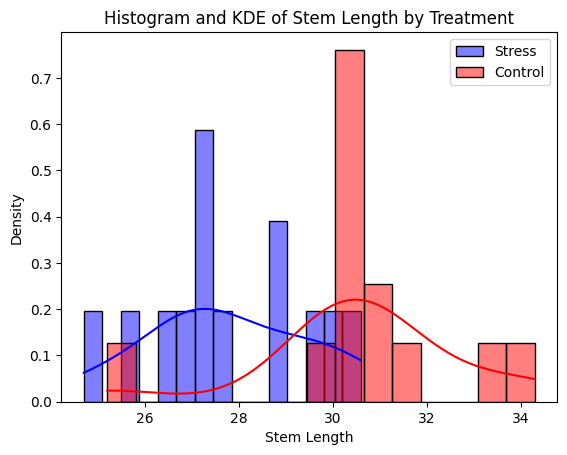

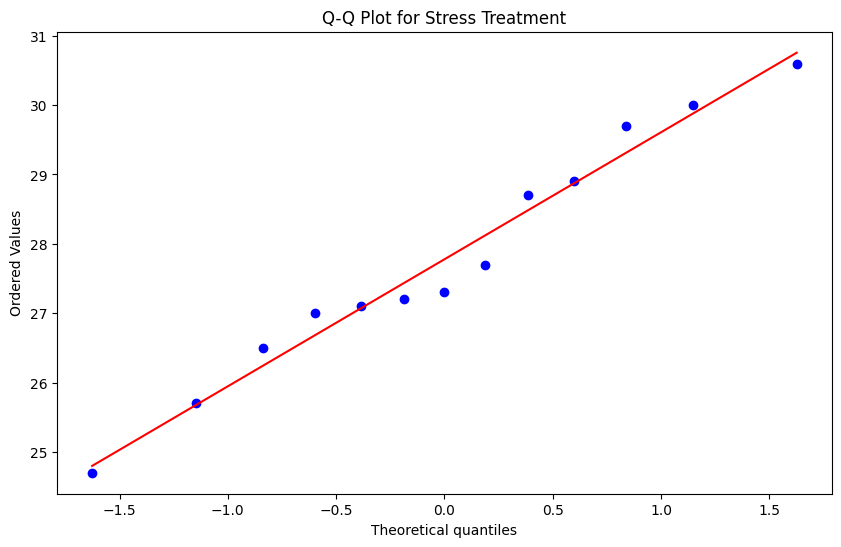

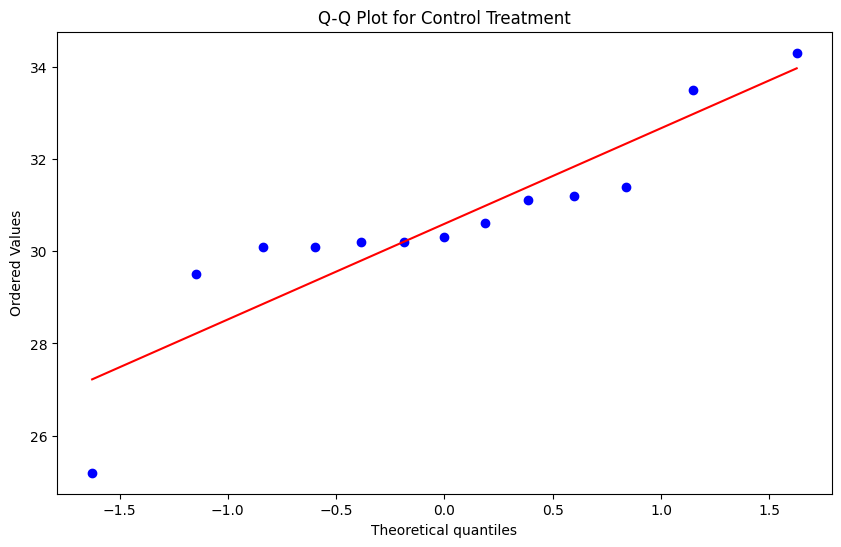

In [10]:
#check for normality and equal variance:
#!pip3 install seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

#check normality with histogram
sns.histplot(ex1[ex1['Treatment'] == 'stress']['StemLength'], kde=True, label='Stress', color='blue', stat='density', bins=15)
sns.histplot(ex1[ex1['Treatment'] == 'control']['StemLength'], kde=True, label='Control', color='red', stat='density', bins=15)

plt.title('Histogram and KDE of Stem Length by Treatment')
plt.xlabel('Stem Length')
plt.ylabel('Density')
plt.legend()
plt.show()

#check normality with q-q plot
import scipy.stats as stats

# Q-Q plot for Stress group
plt.figure(figsize=(10, 6))
stats.probplot(ex1[ex1['Treatment'] == 'stress']['StemLength'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Stress Treatment')
plt.show()

# Q-Q plot for Control group
plt.figure(figsize=(10, 6))
stats.probplot(ex1[ex1['Treatment'] == 'control']['StemLength'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Control Treatment')
plt.show()


The histogram shows an approximately normal curve for the StemLength data. The Q-Q Plots for both the treatment and control groups also show an approximately linear trend, thus we can assume normality.

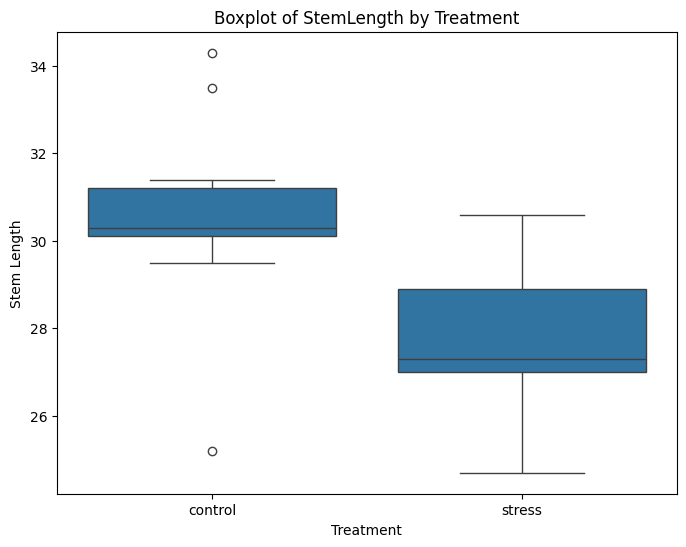

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Treatment', y='StemLength', data=ex1)
plt.title('Boxplot of StemLength by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Stem Length')
plt.show()

The box for the stress group is wider than the control group, as well as the whiskers for the stress group. The control group has more outliers than the stress group (no outliers). These trends indicate that the variance for the stress and control group are not equal. Thus, we assume normality but not variance equality. We will use the Welch t-test.

In [22]:
#H0 = stress has no effect on growth speed of plants Ha = stress slows growth speed of plants
#H0 = mean stem length of both groups of plants are equal Ha = mean stem length of test group of plants is less than the mean stem length of control group of plants

from scipy.stats import ttest_ind
import numpy as np
from scipy import stats
test_length = ex1[ex1['Treatment'] == 'stress']['StemLength']
control_length = ex1[ex1['Treatment'] == 'control']['StemLength']
t_stat, p_value = stats.ttest_ind(test_length, control_length, equal_var = False, alternative = 'less')
print('Welch t-test results:')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Welch t-test results:
T-statistic: -3.6985738545511806
P-value: 0.0005927846403306165


The p-value is 0.00059, and it is less than the alpha which is 0.01. Thus, the result is statistically significant, and we can reject the null hypothesis that the treatment has no effect.
This means that it is unlikely that the difference in the soybean plants' stem length is due to pure random chance. We have significant evidence to conclude that the mechanical stress slows growth of soybean plant's stem length compared to the control.

## Part 2

Construct a 95% confidence interval for the population mean reduction in stem length. 

In [13]:
from scipy.stats import t

# Calculate the means for each group
mean_stress = np.mean(test_length)
mean_control = np.mean(control_length)

# Calculate the standard deviations for each group
std_stress = np.std(test_length, ddof=1)  # Sample standard deviation
std_control = np.std(control_length, ddof=1)

# Calculate the sample sizes for each group
n_stress = len(test_length)
n_control = len(control_length)

# Calculate the standard error of the difference in means
se_diff = np.sqrt((std_stress**2 / n_stress) + (std_control**2 / n_control))

# Calculate the degrees of freedom using the Welch-Satterthwaite equation
df = ((std_stress**2 / n_stress + std_control**2 / n_control)**2) / \
     (((std_stress**2 / n_stress)**2 / (n_stress - 1)) + ((std_control**2 / n_control)**2 / (n_control - 1)))

# Calculate the critical t-value for a 95% confidence level
t_critical = t.ppf(0.975, df)  # 0.975 for 95% confidence

# Calculate the confidence interval for the mean difference
mean_diff = mean_stress - mean_control
margin_of_error = t_critical * se_diff

# Confidence interval
ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

# Print the results
print(f"Mean reduction in stem length: {mean_diff:.4f}")
print(f"95% Confidence Interval for the population mean reduction: ({ci_lower:.4f}, {ci_upper:.4f})")

Mean reduction in stem length: -2.8154
95% Confidence Interval for the population mean reduction: (-4.3901, -1.2407)


Does the confidence interval indicate whether the effect of stress is "horticulturally important," if "horticulturally important" is defined as a reduction in population mean stem length of at least 1 cm?

Yes, the 95% confidence interval is between a reduction of 1.2407cm and 4.3901cm. We are 95% confident that the true population mean stem length is between 1.2407 cm and 4.3901 cm, which is longer than 1 cm. We are 95% confident that the effect of stress is "horticulturally important".

Does the confidence interval indicate whether the effect of stress is "horticulturally important," if "horticulturally important" is defined as a reduction in population mean stem length of at least 5 cm?

No, the 95% confidence interval shows that we are 95% confident that the true population mean stem length is between 1.2407 cm and 4.3901 cm, which does not include 5 cm.

## Part 3

Compare the treatments using a Wilcoxon-Mann-Whitney test at alpha = 0.01. Let the alternative hypothesis be that stress tends to **slow growth.**

In [16]:
u_stat, p_value = stats.mannwhitneyu(test_length, control_length, alternative='less')
print('Wilcoxon-Mann-Whitney test results:')
print('U-statistic=', u_stat)
print('p_value =', p_value)

Wilcoxon-Mann-Whitney test results:
U-statistic= 20.5
p_value = 0.0005608409427515026


The p-value from the Wilcoxon-Mann-Whitney test is 0.00056, which is less than the alpha (0.01). Thus, we have significant evidence to reject the null hypothesis and conclude that the stress tends to slow growth.

# Exercise 2

The data is based on the following journal article, referenced by Samuels, et al..

Sargent, P. A., Sharpley, A. L., Williams, C., Goodall, E. M., & Cowen, P. J. (1997). 5-HT2C receptor activation decreases appetite and body weight in obese subjects. Psychopharmacology, 133, 309-312.

https://www.researchgate.net/profile/Ann_Sharpley/publication/13869188_5-HT2C_activation_decreases_appetite_and_body_weight_in_obese_subjects/links/559275b908ae47a34910f4ba.pdf

## Part 1

During a weight loss study, each of nine female subjects was given 

(1) the active drug m-chlorophenylpiperazine (mCPP) for two weeks and then a placebo for another two weeks, or 

(2) the placebo for the first two weeks and then mCPP for the second two weeks.
The data shows the amount of weight loss (kg) for the nine subjects when taking the drug mCPP and when taking a placebo. (Note that if a subject gained weight, then the recorded weight loss is negative, as is the case for subject 2 who gained 0.3 kg when on the placebo.) 

Use a t-test to investigate the claim that mCPP affects weight loss. Let HA be non-directional and let alpha = 0.01.

In [18]:
ex2 = pd.read_csv('HW1Ex2Part1.csv')
print(ex2.head())

   Subject  mCPP  Placebo
0        1   1.1      0.0
1        2   1.3     -0.3
2        3   1.0      0.6
3        4   1.7      0.3
4        5   1.4     -0.7


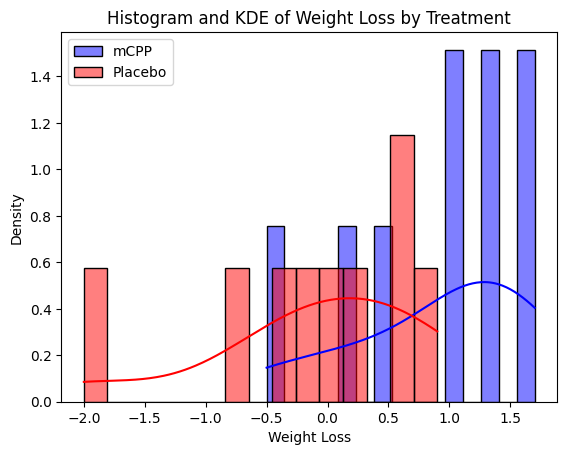

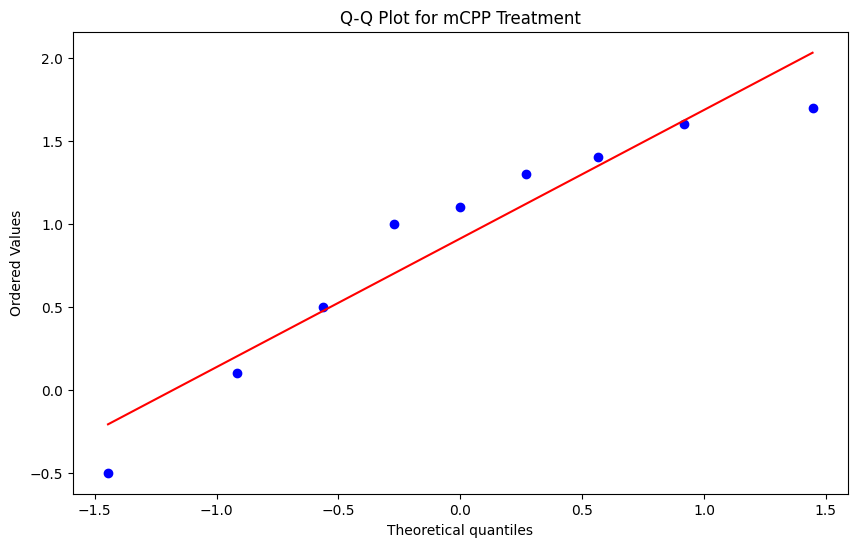

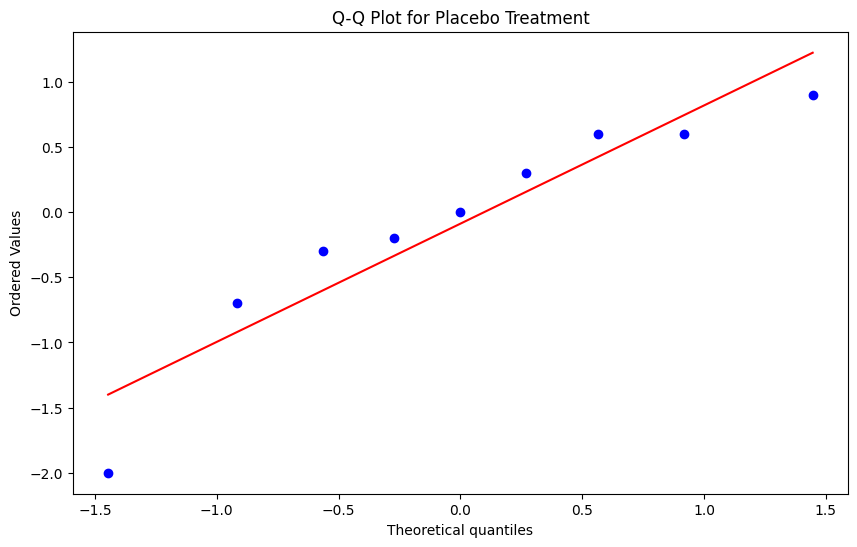

In [19]:
#visualize the data to check normality and variance equality
#check normality with histogram
sns.histplot(ex2['mCPP'], kde=True, label='mCPP', color='blue', stat='density', bins=15)
sns.histplot(ex2['Placebo'], kde=True, label='Placebo', color='red', stat='density', bins=15)

plt.title('Histogram and KDE of Weight Loss by Treatment')
plt.xlabel('Weight Loss')
plt.ylabel('Density')
plt.legend()
plt.show()

#check normality with q-q plot
import scipy.stats as stats

# Q-Q plot for mCPP group
plt.figure(figsize=(10, 6))
stats.probplot(ex2['mCPP'], dist="norm", plot=plt)
plt.title('Q-Q Plot for mCPP Treatment')
plt.show()

# Q-Q plot for Placebo group
plt.figure(figsize=(10, 6))
stats.probplot(ex2['Placebo'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Placebo Treatment')
plt.show()

The histogram shows both treatments' data distributions are skewed to the left. The Q-Q Plots for both the treatment and control groups show an approximately linear trend, thus we can assume normality.

   Subject Treatment  Measurement
0        1      mCPP          1.1
1        2      mCPP          1.3
2        3      mCPP          1.0
3        4      mCPP          1.7
4        5      mCPP          1.4


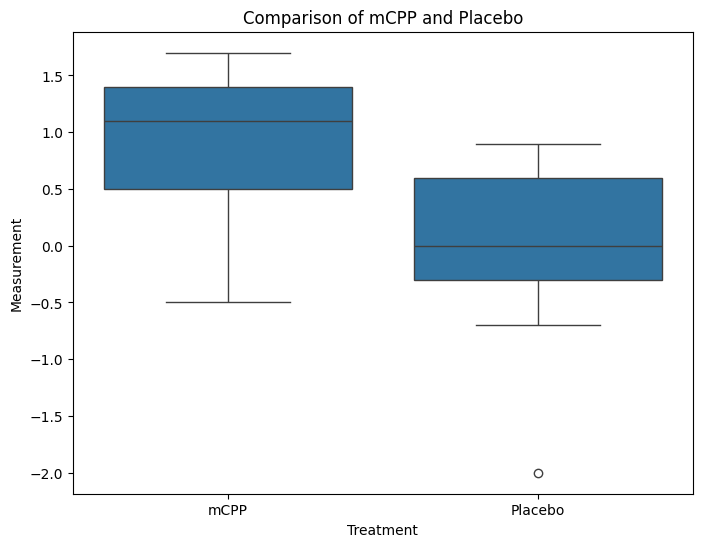

In [21]:
# Melt the DataFrame to long format
df_melted = ex2.melt(id_vars=['Subject'], value_vars=['mCPP', 'Placebo'], var_name='Treatment', value_name='Measurement')

# Check the reshaped DataFrame
print(df_melted.head())

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Treatment', y='Measurement', data=df_melted)

# Set the title and labels
plt.title('Comparison of mCPP and Placebo')
plt.xlabel('Treatment')
plt.ylabel('Measurement')

# Show the plot
plt.show()

The box widths are about the same for both mCPP and Placebo, but the whiskers are longer for mCPP than Placebo. The Placebo group has more outliers than the mCPP group (no outliers). These trends indicate that the variance for the mCPP and Placebo groups are not equal. Thus, we assume normality but not variance equality. We will use the Welch t-test.

In [23]:
test_weight = ex2['mCPP']
control_weight = ex2['Placebo']
t_stat, p_value = stats.ttest_ind(test_weight, control_weight, equal_var = False)
print('Welch t-test results:')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Welch t-test results:
T-statistic: 2.616400677208566
P-value: 0.019040656789739045


As the p-value is 0.019, and this is higher than the alpha level of 0.01, we fail to reject the null hypothesis. We do not have significant evidence to conclude that mCPP affects weight loss.

## Part 2

The same study included a group of nine men. They were randomly assigned treatments in a similar way to the women in part 1. For each man two measurements were made: weight change when taking mCPP and weight change when taking the placebo.

Analyze the data with a Wilcoxon signed-rank test at the alpha = 0.05 level; use a nondirectional alternative with alpha = 0.05

In [25]:
ex2p2 = pd.read_csv('HW1Ex2Part2.csv')
print(ex2p2.head())

   Subject  mCPP  Placebo
0        1   0.0     -1.1
1        2  -1.1      0.5
2        3  -1.6      0.5
3        4  -0.3      0.0
4        5  -1.1     -0.5


In [26]:
from scipy.stats import wilcoxon
# Perform the Wilcoxon signed-rank test for the two paired samples (mCPP and Placebo)
stat, p_value = wilcoxon(ex2p2['mCPP'], ex2p2['Placebo'])

# Print the test statistic and p-value
print(f"Wilcoxon Signed-Rank Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between mCPP and Placebo.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between mCPP and Placebo.")

Wilcoxon Signed-Rank Test Statistic: 15.0
P-value: 0.42578125
Fail to reject the null hypothesis: There is no significant difference between mCPP and Placebo.


As the p value (0.426) is greater than alpha (0.05), we fail to reject the null hypothesis. We do not have significant evidence to conclude that there is a difference between taking mCPP and Placebo on the weight loss of the 9 men in the study.

# Exercise 3

The data is based on the following journal article, referenced by Samuels, et al. 

Ware, J. H. (1989). Investigating therapies of potentially great benefit: ECMO. Statistical Science, 298-306.

http://www.jstor.org/stable/2245829?seq=1#page_scan_tab_contents

Extracorporeal membrane oxygenation (ECMO) is a procedure that is used to treat newborn babies who suffer from severe respiratory failure. An experiment was conducted in which 29 babies were treated with ECMO and 10 babies were treated with conventional medical therapy (CMT). The outcomes of this study are shown here 

In [28]:
ex3 = pd.DataFrame({
    'outcome': ['Die'] * 4 + ['Live'] * 6 + ['Die'] * 1 + ['Live'] * 28,
    'treatment': ['CMT'] * 10 + ['ECMO'] * 29
})

result = ex3.groupby(['outcome', 'treatment']).size().unstack(fill_value=0)
result.loc['Total'] = result.sum()
result['Total'] = result.sum(axis=1)
result

treatment,CMT,ECMO,Total
outcome,,,
Die,4,1,5
Live,6,28,34
Total,10,29,39


## Part 1

Why is the chi-squared test not appropriate for this study?

The chi-squared test is not appropriate for this study because we should not expect death for any of these methods, as expecting death from these treatments violates the ethics of the study. For the chi-squared test, we need the expected frequency to be at least 5. When the expected frequency is too low, the chi-squared distribution will not follow the correct distribution, and this may distort the p-value and make the test invalid.

#### Part 2. Perform a randomization test (with at least 5000 randomizations) to test if ECMO is more effective at saving the lives of newborn babies with respiratory failure.

In [30]:
# Separate the data based on treatment
ecmo_data = ex3[ex3['treatment'] == 'ECMO']['outcome']
cmt_data = ex3[ex3['treatment'] == 'CMT']['outcome']

# Calculate the observed difference in proportion of "Live" outcomes
def calc_proportion_difference(ecmo_data, cmt_data):
    ecmo_live = np.sum(ecmo_data == 'Live') / len(ecmo_data)
    cmt_live = np.sum(cmt_data == 'Live') / len(cmt_data)
    return ecmo_live - cmt_live

observed_diff = calc_proportion_difference(ecmo_data, cmt_data)
print(f"Observed difference in proportion of 'Live': {observed_diff:.4f}")

# Number of randomizations
n_randomizations = 5000
randomized_diffs = []

# Randomization procedure
np.random.seed(42)  # For reproducibility
for _ in range(n_randomizations):
    # Combine the outcomes and shuffle them
    combined_outcomes = np.concatenate([ecmo_data, cmt_data])
    np.random.shuffle(combined_outcomes)
    
    # Split the shuffled outcomes back into two groups
    randomized_ecmo = combined_outcomes[:len(ecmo_data)]
    randomized_cmt = combined_outcomes[len(ecmo_data):]
    
    # Calculate the difference in proportions for this randomization
    randomized_diff = calc_proportion_difference(randomized_ecmo, randomized_cmt)
    randomized_diffs.append(randomized_diff)

# Convert the list of random differences to a numpy array
randomized_diffs = np.array(randomized_diffs)

# Calculate the p-value as the proportion of random differences that are as extreme or more extreme than the observed difference
p_value = np.mean(np.abs(randomized_diffs) >= np.abs(observed_diff))

print(f"P-value from randomization test: {p_value:.4f}")

# Conclusion based on p-value (using alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: ECMO is more effective than CMT in saving newborn lives.")
else:
    print("Fail to reject the null hypothesis: There is no evidence that ECMO is more effective than CMT.")

Observed difference in proportion of 'Live': 0.3655
P-value from randomization test: 0.0120
Reject the null hypothesis: ECMO is more effective than CMT in saving newborn lives.


As the p-value is 0.0120 and is less than the alpha of 0.05, we can reject the null hypothesis and have significant evidence to conclude that ECMO is more effective than CMT in saving the lives of newborn babies with respiratory failure.

#### Part 3. Use Fisher's exact test to test if ECMO is more effective at saving the lives of newborn babies with respiratory failure. Use alpha = 0.05.

In [34]:
from scipy.stats import fisher_exact

# Step 1: Create the contingency table
# We will create a contingency table where:
# - 'outcome' has 'Die' and 'Live'
# - 'treatment' has 'CMT' and 'ECMO'
contingency_table = pd.crosstab(ex3['treatment'], ex3['outcome'])

# Step 2: Perform Fisher's Exact Test
oddsratio, p_value = fisher_exact(contingency_table)

# Step 3: Print the results
print(f"Contingency Table:\n{contingency_table}")
print(f"Fisher's Exact Test p-value: {p_value}")

# Step 4: Interpret the result
if p_value < 0.05:
    print("There is significant evidence to suggest that ECMO is more effective than CMT.")
else:
    print("There is insufficient evidence to suggest that ECMO is more effective than CMT.")

Contingency Table:
outcome    Die  Live
treatment           
CMT          4     6
ECMO         1    28
Fisher's Exact Test p-value: 0.011015063646642594
There is significant evidence to suggest that ECMO is more effective than CMT.


As the p-value is 0.011 and is less than the alpha of 0.05, we have significant evidence to conclude that ECMO is more effective than CMT.

# Exercise 4

The data is based on the following journal article, referenced by Samuels, et al. 

Johnson, S. K., & Johnson, R. E. (1972). Tonsillectomy history in Hodgkin's disease. New England Journal of Medicine, 287(22), 1122-1125.

http://www.nejm.org/doi/full/10.1056/NEJM197211302872205#t=articleTop

A study of 85 patients with Hodgkin's disease found that 41 had had their tonsils removed. Each patient was matched with a sibling of the same sex. Only 33 of the siblings had undergone tonsillectomy. The data are shown in the following table.

In [36]:
ex4 = pd.DataFrame({
    'hodkins': ['yes'] * 26 + ['no'] * 7 + ['yes'] * 15 + ['no'] * 37,
    'sibling': ['yes'] * 33 + ['no'] * 52
})

table_ex4 = ex4.value_counts().unstack().fillna(0)
print(ex4.head())

  hodkins sibling
0     yes     yes
1     yes     yes
2     yes     yes
3     yes     yes
4     yes     yes


#### Use McNemar's test to test the hypothesis that "yes/no" and "no/yes" pairs are equally likely. Let a = 0.05

In [39]:
#!pip3 install statsmodels
from statsmodels.stats.contingency_tables import mcnemar

# Define the DataFrame based on your provided data
ex4 = pd.DataFrame({
    'hodkins': ['yes'] * 26 + ['no'] * 7 + ['yes'] * 15 + ['no'] * 37,
    'sibling': ['yes'] * 33 + ['no'] * 52
})

# Step 1: Create the contingency table
table_ex4 = ex4.value_counts().unstack().fillna(0)

# Step 2: Apply McNemar's test
# McNemar's test requires a 2x2 table
result = mcnemar(table_ex4, exact=True)

# Step 3: Print the results
print(f"Contingency Table:\n{table_ex4}")
print(f"McNemar's Test p-value: {result.pvalue}")

# Step 4: Interpret the result
if result.pvalue < 0.05:
    print("There is significant evidence to reject the null hypothesis that 'yes/no' and 'no/yes' pairs are equally likely.")
else:
    print("There is insufficient evidence to reject the null hypothesis that 'yes/no' and 'no/yes' pairs are equally likely.")


Contingency Table:
sibling  no  yes
hodkins         
no       37    7
yes      15   26
McNemar's Test p-value: 0.13380050659179688
There is insufficient evidence to reject the null hypothesis that 'yes/no' and 'no/yes' pairs are equally likely.


As the p-value is 0.134, and this is greater than the alpha which is 0.05, we do not have sufficient evidence to reject the null hypothesis that the "yes/no" and "no/yes" pairs are equally likely.

# Exercise 5 - dplyr

These exercises are taken from Wickham's R for Data Science book chapter 5.
The data comes from the package `library(nycflights13)`

In [5]:
# Load the dataset
flights = pd.read_csv('flights.csv')
print(flights.head())

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      141

### From section 5.2.4 

#### 1:

Find all flights that

#### Had an arrival delay of two or more hours

In [107]:
arrival_delay_2_plus = flights[flights['arr_delay']>=120.0] #2 hours is 120 min
print(arrival_delay_2_plus)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
119     2013      1    1     811.0             630      101.0    1047.0   
151     2013      1    1     848.0            1835      853.0    1001.0   
218     2013      1    1     957.0             733      144.0    1056.0   
268     2013      1    1    1114.0             900      134.0    1447.0   
447     2013      1    1    1505.0            1310      115.0    1638.0   
...      ...    ...  ...       ...             ...        ...       ...   
336579  2013      9   30    1823.0            1545      158.0    1934.0   
336668  2013      9   30    1951.0            1649      182.0    2157.0   
336724  2013      9   30    2053.0            1815      158.0    2310.0   
336757  2013      9   30    2159.0            1845      194.0    2344.0   
336763  2013      9   30    2235.0            2001      154.0      59.0   

        sched_arr_time  arr_delay carrier  ...  tailnum origin dest air_time  \
119                

#### Flew to Houston (IAH or HOU)

In [54]:
Houston_flights = flights[(flights['dest']== 'IAH') | (flights['dest'] =='HOU')]
print(Houston_flights)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
32      2013      1    1     623.0             627       -4.0     933.0   
81      2013      1    1     728.0             732       -4.0    1041.0   
89      2013      1    1     739.0             739        0.0    1104.0   
...      ...    ...  ...       ...             ...        ...       ...   
336524  2013      9   30    1729.0            1720        9.0    2001.0   
336527  2013      9   30    1735.0            1715       20.0    2010.0   
336618  2013      9   30    1859.0            1859        0.0    2134.0   
336694  2013      9   30    2015.0            2015        0.0    2244.0   
336737  2013      9   30    2105.0            2106       -1.0    2329.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819    

#### Were operated by United, American, or Delta

In [55]:
UAD_operated_flights = flights[(flights['carrier']== 'UA') | (flights['carrier']=='AA') | (flights['carrier']=='DL')]
print(UAD_operated_flights)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
4       2013      1    1     554.0             600       -6.0     812.0   
5       2013      1    1     554.0             558       -4.0     740.0   
...      ...    ...  ...       ...             ...        ...       ...   
336737  2013      9   30    2105.0            2106       -1.0    2329.0   
336744  2013      9   30    2121.0            2100       21.0    2349.0   
336751  2013      9   30    2140.0            2140        0.0      10.0   
336755  2013      9   30    2149.0            2156       -7.0    2245.0   
336762  2013      9   30    2233.0            2113       80.0     112.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819    

#### Departed in summer (July, August, and September)

In [56]:
JAS_departed_flights = flights[(flights['month']==7) | (flights['month']==8) | (flights['month']==9)]
print(JAS_departed_flights)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
250450  2013      7    1       1.0            2029      212.0     236.0   
250451  2013      7    1       2.0            2359        3.0     344.0   
250452  2013      7    1      29.0            2245      104.0     151.0   
250453  2013      7    1      43.0            2130      193.0     322.0   
250454  2013      7    1      44.0            2150      174.0     300.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
250450            2359    

#### Arrived more than two hours late, but didn't leave late

In [114]:
# Filter flights where arrival delay > 2 hours and departure delay <= 0
late_arrival_on_time_departure = flights[(flights['arr_delay'] > 120.0) & (flights['dep_delay'] <= 0)]

# Print the result
print(late_arrival_on_time_departure)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
22911   2013      1   27    1419.0            1420       -1.0    1754.0   
33011   2013     10    7    1350.0            1350        0.0    1736.0   
33019   2013     10    7    1357.0            1359       -2.0    1858.0   
41075   2013     10   16     657.0             700       -3.0    1258.0   
55985   2013     11    1     658.0             700       -2.0    1329.0   
152766  2013      3   18    1844.0            1847       -3.0      39.0   
180893  2013      4   17    1635.0            1640       -5.0    2049.0   
181270  2013      4   18     558.0             600       -2.0    1149.0   
181327  2013      4   18     655.0             700       -5.0    1213.0   
213693  2013      5   22    1827.0            1830       -3.0    2217.0   
214512  2013      5   23    1810.0            1810        0.0    2208.0   
226434  2013      6    5    1604.0            1615      -11.0    2041.0   
235033  2013      6   14 

#### Were delayed by at least an hour, but made up over 30 minutes in flight

In [67]:
delay_thirty = flights[(flights['dep_delay'] >= 60.0) & (flights['arr_time']-flights['dep_time'] > 30.0)]
print(delay_thirty)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
119     2013      1    1     811.0             630      101.0    1047.0   
135     2013      1    1     826.0             715       71.0    1136.0   
151     2013      1    1     848.0            1835      853.0    1001.0   
218     2013      1    1     957.0             733      144.0    1056.0   
268     2013      1    1    1114.0             900      134.0    1447.0   
...      ...    ...  ...       ...             ...        ...       ...   
336704  2013      9   30    2028.0            1910       78.0    2255.0   
336724  2013      9   30    2053.0            1815      158.0    2310.0   
336742  2013      9   30    2119.0            2005       74.0    2310.0   
336757  2013      9   30    2159.0            1845      194.0    2344.0   
336760  2013      9   30    2211.0            2059       72.0    2339.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
119                830    

#### Departed between midnight and 6am (inclusive)

In [116]:
midnight_six = flights[(flights['dep_time']>=0000) & (flights['dep_time']<=600)]
print(midnight_six)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
335802  2013      9   30     557.0             600       -3.0     852.0   
335803  2013      9   30     558.0             600       -2.0     815.0   
335804  2013      9   30     558.0             600       -2.0     742.0   
335805  2013      9   30     559.0             600       -1.0       NaN   
335806  2013      9   30     600.0             600        0.0     844.0   

        sched_arr_time  arr_delay carrier  ...  tailnum origin dest air_time  \
0                  

### From section 5.5.2 

#### 1. Currently dep_time and sched_dep_time are convenient to look at, but hard to compute with because they're not really continuous numbers. Convert them to a more convenient representation of number of minutes since midnight.

In [10]:
flights['dep_time_since_midnight'] = flights['dep_time'].apply(lambda x: int(x//100) * 60 + int(x % 100) if pd.notna(x) else None)
print(flights['dep_time_since_midnight'])

0         317.0
1         333.0
2         342.0
3         344.0
4         354.0
          ...  
336771      NaN
336772      NaN
336773      NaN
336774      NaN
336775      NaN
Name: dep_time_since_midnight, Length: 336776, dtype: float64


### From section 5.6.7

#### 4. Look at the number of cancelled flights per day. Is there a pattern? Is the proportion of cancelled flights related to the average delay?

In [99]:
#Make new df
flights_new = flights.copy()

#Make date column
flights_new['Date'] = pd.to_datetime(flights_new[['year', 'month', 'day']])

#Group by date and count number of NAs for either dep_delay or arr_delay
flights_new['cancel'] = flights_new[['dep_delay', 'arr_delay']].isna().sum(axis=1)
flights_grouped = flights_new.groupby('Date').agg({'cancel':'sum'}).reset_index()
flights_new = flights_new.merge(flights_grouped, on = 'Date', how = 'left', suffixes = ('', '_per_day'))
print(flights_new)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  ...  dest air_time distance hour  \
0                  8

In [ ]:
# Create average delay per day
daily_avg_delay = flights_new.groupby('Date')['dep_delay'].mean().reset_index()

# Rename the 'dep_delay' column to 'average' in the daily_avg_delay DataFrame
daily_avg_delay.rename(columns={'dep_delay': 'average'}, inplace=True)

# Merge the daily average delay back to the flights_new DataFrame
flights_new = flights_new.merge(daily_avg_delay, on='Date', how='left', suffixes=('', '_from_avg'))

# Print the result to check the columns
print(flights_new)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  ...  distance hour minute  \
0                  819     

        Date  total_cancelled_flights  total_flights  avg_delay  \
0 2013-01-01                       15            842  11.548926   
1 2013-01-02                       23            943  13.858824   
2 2013-01-03                       24            914  10.987832   
3 2013-01-04                       13            915   8.951595   
4 2013-01-05                        6            720   5.732218   

   cancel_to_total_ratio  
0               0.017815  
1               0.024390  
2               0.026258  
3               0.014208  
4               0.008333  


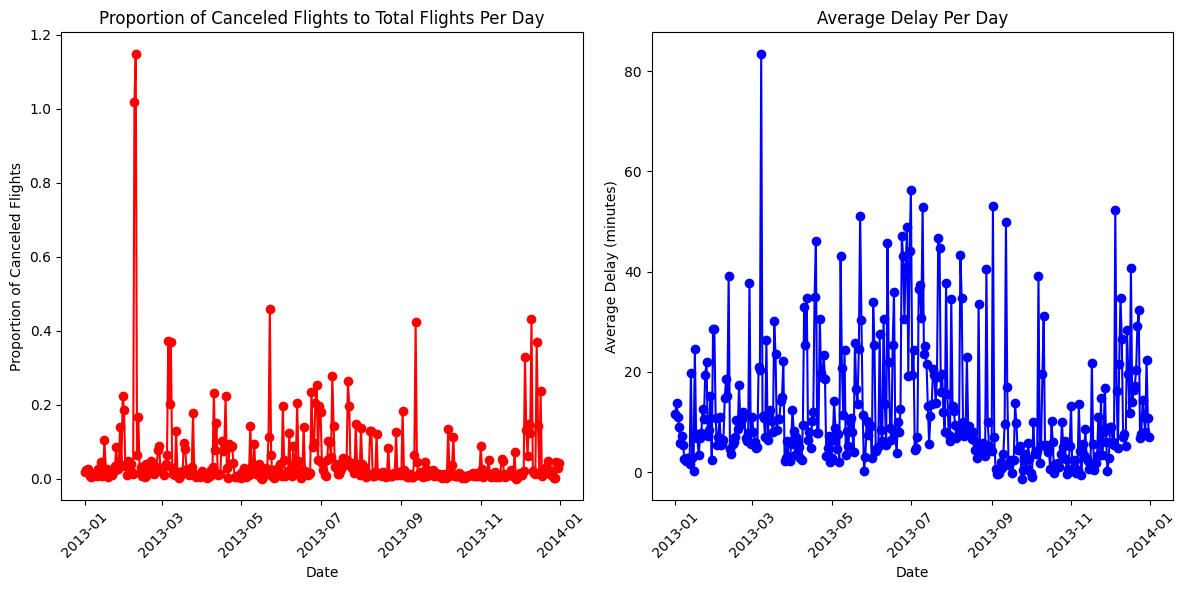

Correlation between canceled flight proportion and average delay:
                        cancel_to_total_ratio  avg_delay
cancel_to_total_ratio               1.000000   0.563426
avg_delay                           0.563426   1.000000


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Date' to get daily statistics
daily_data = flights_new.groupby('Date').agg(
    total_cancelled_flights=('cancel', 'sum'),  # Sum of cancellations per day
    total_flights=('cancel', 'count'),          # Count of total flights per day
    avg_delay=('average_from_avg', 'mean')      # Average delay per day
).reset_index()

# Calculate the proportion of cancelled flights over total flights
daily_data['cancel_to_total_ratio'] = daily_data['total_cancelled_flights'] / daily_data['total_flights']

# Print the daily data
print(daily_data.head())

# Visualize the proportion of canceled flights over total flights vs average delay per day
plt.figure(figsize=(12, 6))

# Plot the proportion of canceled flights over total flights
plt.subplot(1, 2, 1)
plt.plot(daily_data['Date'], daily_data['cancel_to_total_ratio'], marker='o', linestyle='-', color='r')
plt.title('Proportion of Canceled Flights to Total Flights Per Day')
plt.xlabel('Date')
plt.ylabel('Proportion of Canceled Flights')
plt.xticks(rotation=45)

# Plot the average delay per day
plt.subplot(1, 2, 2)
plt.plot(daily_data['Date'], daily_data['avg_delay'], marker='o', linestyle='-', color='b')
plt.title('Average Delay Per Day')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Optionally, check correlation between the proportion of canceled flights and average delay
correlation = daily_data[['cancel_to_total_ratio', 'avg_delay']].corr()
print('Correlation between canceled flight proportion and average delay:\n', correlation)


Interpretation:
Visual Patterns: There are regular peaks or troughs in the proportion of canceled flights, this might suggest external factors affecting cancellations (like weather events, holidays, etc.).

Proportion Analysis: The side-by-side proportion plots show that the two variables behave independently, as when there are higher average delays, it does not always correlate to higher cancellations. The maximum proportion of canceled flights does not match the date for the maximum average delay.

Correlation: There is a mild positive correlation (0.563) between the proportion of canceled flights per day and average delay per day so as average delays increase, the number of cancellations tends to increase. Due to the mild correlation score, delays do not have a strong impact on cancellations.

#### 5. Which carrier has the worst delays? (ignore the challenge section)

In [106]:
# Group by carrier and calculate the average delay for each carrier
carrier_delay = flights_new.groupby('carrier')['dep_delay'].mean().reset_index()

# Sort the results to identify the carrier with the worst delays (highest average delay)
carrier_delay_sorted = carrier_delay.sort_values(by='dep_delay', ascending=False)

# Print the carrier with the worst delays
print("Carrier with the worst delays:")
print(carrier_delay_sorted.head(1))


Carrier with the worst delays:
  carrier  dep_delay
6      F9  20.215543


The carrier with the worst delay is carrier F9, which is Frontier Airlines, Inc, with an average departure delay of 20.216 minutes.